In [1]:
from pyomo.environ import *
import numpy as np
import pandas as pd
import random 
import matplotlib.pyplot as plt
import time

In [11]:
N= 500
df=pd.DataFrame()
df['x']= [random.random() for i in range(N)]
df['y']= [random.random() for i in range(N)]
minD = 0.2

In [12]:
model = AbstractModel()
model.i = RangeSet(N)
model.j = Set(initialize=model.i)

model.x = Var(model.i, within=Binary)

def D_rule(model, i,j):
    return np.sqrt( (df.loc[i-1,'x']-df.loc[j-1,'x'])**2 + (df.loc[i-1,'y']-df.loc[j-1,'y'])**2 )
model.D = Param(model.i,model.j, rule=D_rule)


def C1_rule(model, i,j):
    if i>j and model.D[i,j] <= minD:
        return model.x[i] + model.x[j] <= 1 
    else:
        return Constraint.Skip 
model.C1 = Constraint(model.i,model.j, rule=C1_rule)

def obj_rule(model):
    return sum(model.x[i] for i in model.i)
model.OF = Objective(rule=obj_rule,sense=maximize)

In [13]:
opt = SolverFactory('cbc')
instance = model.create_instance()

start = time.time()
results = opt.solve(instance) # solves and updates instance
print('Time is ', round(time.time() - start, 4) ) 

if (results.solver.status == SolverStatus.ok) and (results.solver.termination_condition == TerminationCondition.optimal):
    print('feasible')
elif (results.solver.termination_condition == TerminationCondition.infeasible):
    print('infeasible')
else:
    print ('Solver Status:',  results.solver.status)
print(value(instance.OF))

Time is  212.7969
feasible
28.0


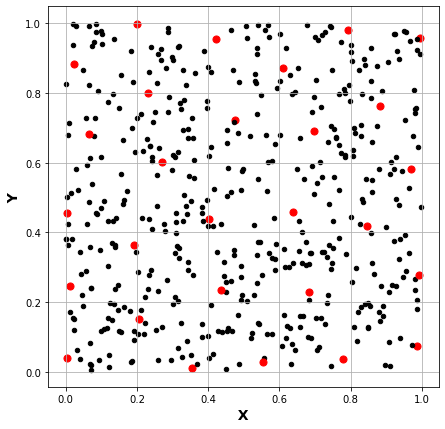

In [14]:
A=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
plt.figure(figsize=(7,7))
for i in instance.i:
        x0 = df.loc[i-1,'x']
        y0 = df.loc[i-1,'y']
        if value(instance.x[i])>0:
            plt.scatter(x0,y0, s=50 , c='r' )
        else:
            plt.scatter(x0,y0, s=20 , c='k' )

plt.xlabel('  X  ' , fontweight = 'bold', fontsize= 14)
plt.ylabel('  Y  ', fontweight = 'bold', fontsize= 14)
plt.grid()
plt.show()

In [15]:
results.write()

# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Name: unknown
  Lower bound: 28.0
  Upper bound: 28.0
  Number of objectives: 1
  Number of constraints: 12661
  Number of variables: 500
  Number of binary variables: 500
  Number of integer variables: 500
  Number of nonzeros: 500
  Sense: maximize
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  User time: -1.0
  System time: 211.52
  Wallclock time: 212.44
  Termination condition: optimal
  Termination message: Model was solved to optimality (subject to tolerances), and an optimal solution is available.
  Statistics: 
    Branch 